**Introduction to the Problem**

Disasters, both natural and man-made, pose significant threats to communities and ecosystems worldwide. The impact of disasters can be devastating, resulting in loss of life, property damage, and disruption of essential services. In recent years, there has been a growing recognition of the importance of understanding and managing disaster risk to mitigate the adverse effects.

For this project, we focused on building a classification model to assess disaster risk based on the World Risk Index (WRI) data. The WRI incorporates various factors such as exposure, vulnerability, and susceptibility to determine the level of risk faced by different regions. By accurately classifying the severity of disaster risk, we aim to provide valuable insights for disaster preparedness and response efforts.



The "WRI Category" in the context of your dataset refers to the Weather-related Disaster Risk Index (WRI) category. This index is a measure used to assess the potential for weather-related disasters to occur in a particular location. The categories typically used for the WRI are:

1. **Low**: This category indicates a low risk of weather-related disasters. The weather conditions are unlikely to cause significant damage or disruption.

2. **Medium**: This category suggests a moderate risk of weather-related disasters. While not extremely severe, the potential for damage or disruption is likely to occur.

3. **High**: This category signifies a high risk of weather-related disasters. The weather conditions are likely to cause significant damage or disruption.

4. **Very High**: This category indicates a very high risk of weather-related disasters. The weather conditions are highly likely to cause significant damage or disruption.

The WRI category is derived from the WRI score, which is a numerical value that ranges from 0 to 100. The categories are often determined based on predefined thresholds, such as:

- **Low**: WRI score < 25
- **Medium**: WRI score 25-50
- **High**: WRI score 50-75
- **Very High**: WRI score > 75

The WRI category is used to help prioritize disaster risk management efforts and to inform public awareness and preparedness.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import warnings
warnings.filterwarnings("ignore")

In [41]:
import pandas as pd
df=pd.read_csv('world_risk_index.csv')

In [42]:
print(df)


            Region    WRI  Exposure  Vulnerability  Susceptibility  \
0          Vanuatu  32.00     56.33          56.81           37.14   
1            Tonga  29.08     56.04          51.90           28.94   
2      Philippinen  24.32     45.09          53.93           34.99   
3        Salomonen  23.51     36.40          64.60           44.11   
4        Guatemala  20.88     38.42          54.35           35.36   
...            ...    ...       ...            ...             ...   
1912       Grenada   1.42      3.13          45.39           24.54   
1913      Barbados   1.32      3.46          38.26           18.20   
1914  Saudi Arabia   1.14      2.93          38.96           14.80   
1915         Malta   0.60      1.65          36.25           15.97   
1916         Qatar   0.08      0.28          28.18            9.68   

      Lack of Coping Capabilities   Lack of Adaptive Capacities  Year  \
0                           79.34                         53.96  2011   
1            

In [43]:
df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


In [44]:
df.tail()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1912,Grenada,1.42,3.13,45.39,24.54,68.82,42.82,2016,Very Low,Very Low,Medium,Medium
1913,Barbados,1.32,3.46,38.26,18.20,50.29,46.29,2016,Very Low,Very Low,Low,Low
1914,Saudi Arabia,1.14,2.93,38.96,14.80,65.01,37.07,2016,Very Low,Very Low,Low,Very Low
1915,Malta,0.60,1.65,36.25,15.97,59.33,33.44,2016,Very Low,Very Low,Low,Very Low
1916,Qatar,0.08,0.28,28.18,9.68,43.94,30.93,2016,Very Low,Very Low,Very Low,Very Low


In [45]:
df.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1916.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090511,2016.049557
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.551156,3.182045
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000,2011.000000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.192500,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.080000,2016.000000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.065000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


In [47]:
df.shape

(1917, 12)

**Preprocessing Steps**

In our preprocessing steps, we first collected the data from kaggle.
We handled missing values by replacing them with the mean of the respective features, ensuring that no information was lost during the preprocessing stage.

Additionally, we normalized the data to bring all features to a similar scale, preventing any biases during model training.

We also fixed the column names.

We replaced categorical values with numerical values, this known as label encoding. It's often done to convert categorical data into a format that can be used for modeling or analysis, as many machine learning algorithms require numerical input.




In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [49]:
df.isnull().sum()


Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

In [50]:
df.rename(columns={
    ' Lack of Adaptive Capacities':'Lack of Adaptive Capacities'
},inplace = True)
df.isnull().sum()

Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    1
Year                           0
Exposure Category              0
WRI Category                   1
Vulnerability Category         4
Susceptibility Category        0
dtype: int64

In [51]:
df['Lack of Adaptive Capacities'].fillna(df['Lack of Adaptive Capacities'].mean(),inplace=True)
df.isnull().sum()

df.dropna(inplace = True)

df.isnull().sum()

Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    0
Year                           0
Exposure Category              0
WRI Category                   0
Vulnerability Category         0
Susceptibility Category        0
dtype: int64

In [10]:
df.replace({'Exposure Category': {'Very High': 5}}, inplace = True)
df.replace({'Exposure Category': {'High': 4}}, inplace = True)
df.replace({'Exposure Category': {'Medium': 3}}, inplace = True)
df.replace({'Exposure Category': {'Low': 2}}, inplace = True)
df.replace({'Exposure Category': {'Very Low': 1}}, inplace = True)

In [11]:
df.replace({'Vulnerability Category': {'Very High': 5}}, inplace = True)
df.replace({'Vulnerability Category': {'High': 4}}, inplace = True)
df.replace({'Vulnerability Category': {'Medium': 3}}, inplace = True)
df.replace({'Vulnerability Category': {'Low': 2}}, inplace = True)
df.replace({'Vulnerability Category': {'Very Low': 1}}, inplace = True)

In [12]:
df.replace({'Susceptibility Category': {'Very High': 5}}, inplace = True)
df.replace({'Susceptibility Category': {'High': 4}}, inplace = True)
df.replace({'Susceptibility Category': {'Medium': 3}}, inplace = True)
df.replace({'Susceptibility Category': {'Low': 2}}, inplace = True)
df.replace({'Susceptibility Category': {'Very Low': 1}}, inplace = True)

In [13]:
df.replace({'WRI Category': {'Very High': 5}}, inplace = True)
df.replace({'WRI Category': {'High': 4}}, inplace = True)
df.replace({'WRI Category': {'Medium': 3}}, inplace = True)
df.replace({'WRI Category': {'Low': 2}}, inplace = True)
df.replace({'WRI Category': {'Very Low': 1}}, inplace = True)

In [52]:
df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


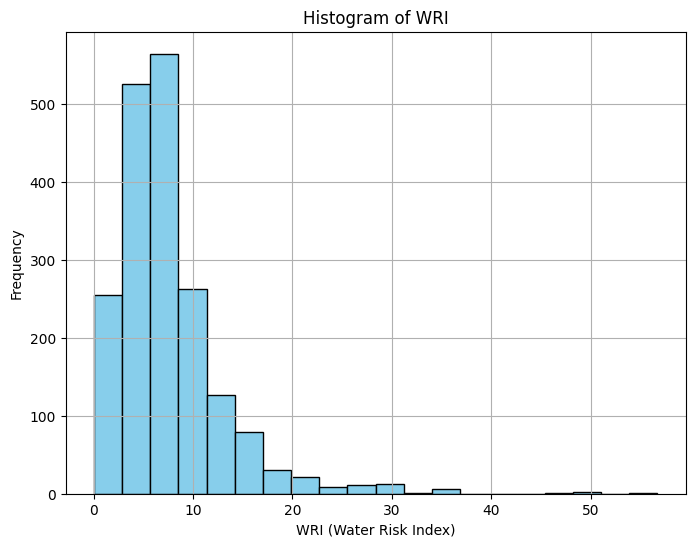

In [15]:
#VISUALIZATIONS
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['WRI'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('WRI (Water Risk Index)')
plt.ylabel('Frequency')
plt.title('Histogram of WRI')
plt.grid(True)
plt.show()



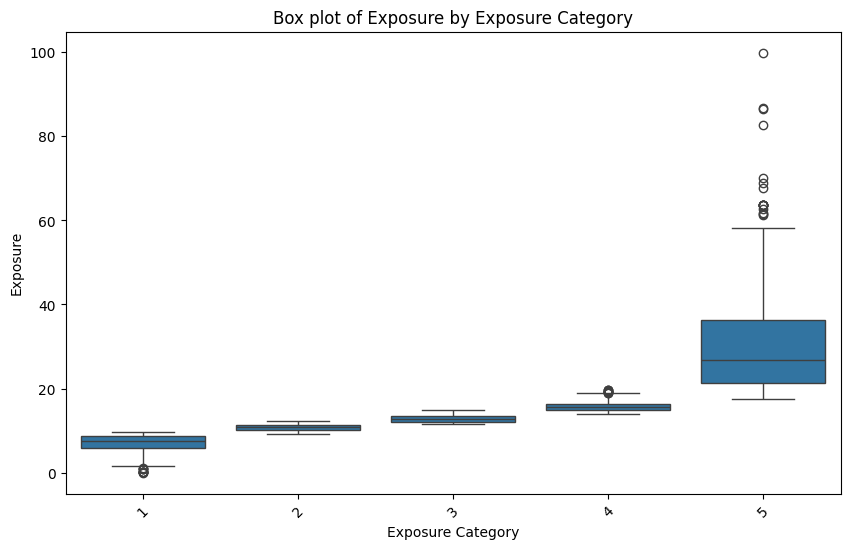

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exposure Category', y='Exposure', data=df)
plt.xlabel('Exposure Category')
plt.ylabel('Exposure')
plt.title('Box plot of Exposure by Exposure Category')
plt.xticks(rotation=45)
plt.show()


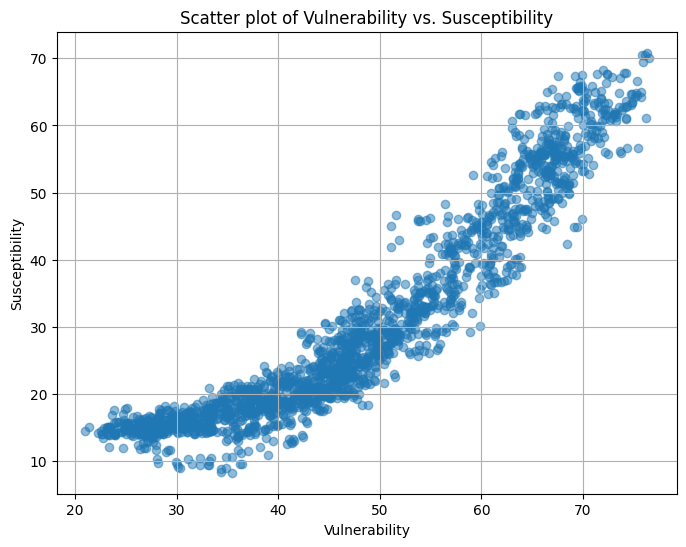

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Vulnerability'], df['Susceptibility'], alpha=0.5)
plt.xlabel('Vulnerability')
plt.ylabel('Susceptibility')
plt.title('Scatter plot of Vulnerability vs. Susceptibility')
plt.grid(True)
plt.show()


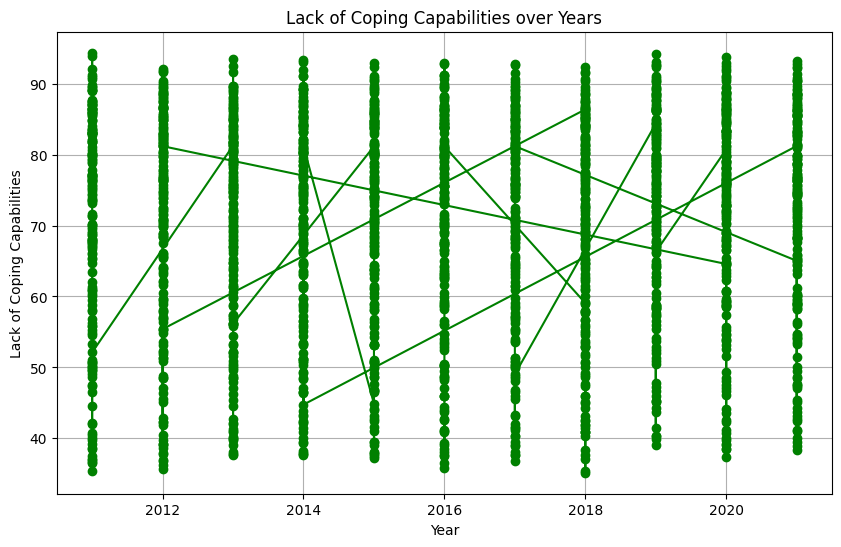

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Lack of Coping Capabilities'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Lack of Coping Capabilities')
plt.title('Lack of Coping Capabilities over Years')
plt.grid(True)
plt.show()


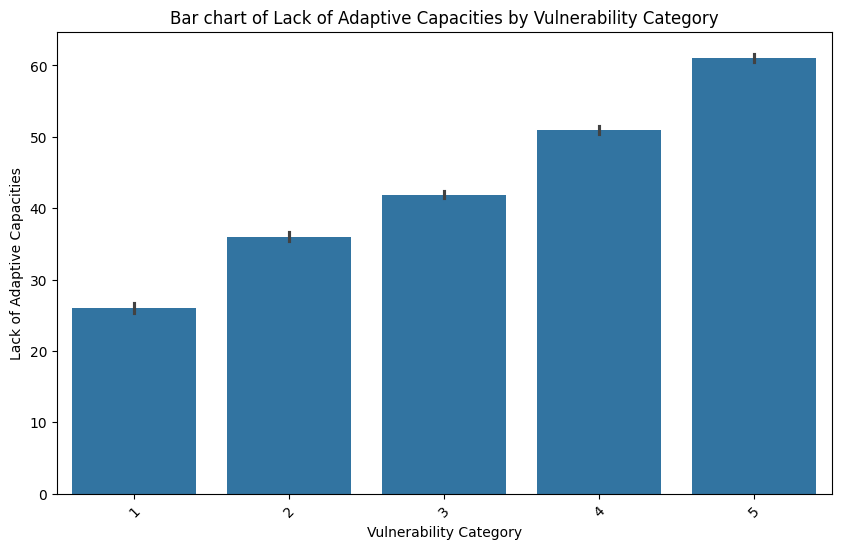

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Vulnerability Category', y='Lack of Adaptive Capacities', data=df)
plt.xlabel('Vulnerability Category')
plt.ylabel('Lack of Adaptive Capacities')
plt.title('Bar chart of Lack of Adaptive Capacities by Vulnerability Category')
plt.xticks(rotation=45)
plt.show()


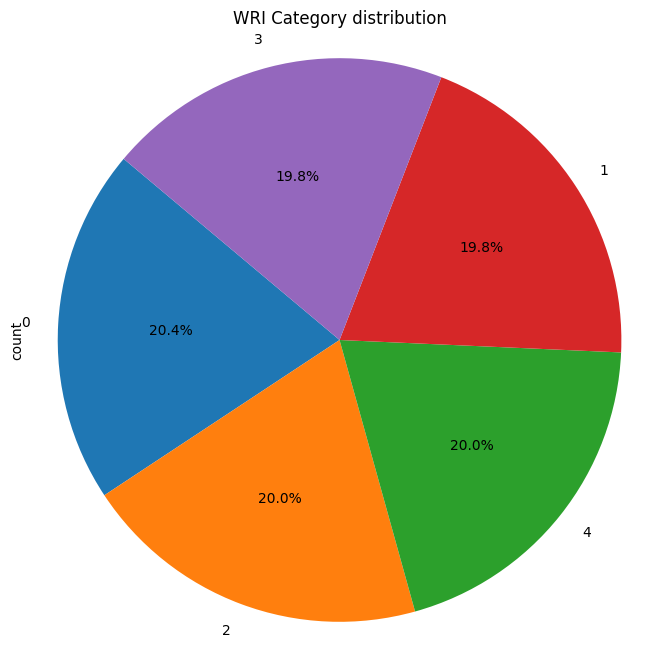

In [ ]:
plt.figure(figsize=(8, 8))
df['WRI Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('WRI Category distribution')
plt.axis('equal')
plt.show()


<Figure size 1200x800 with 0 Axes>

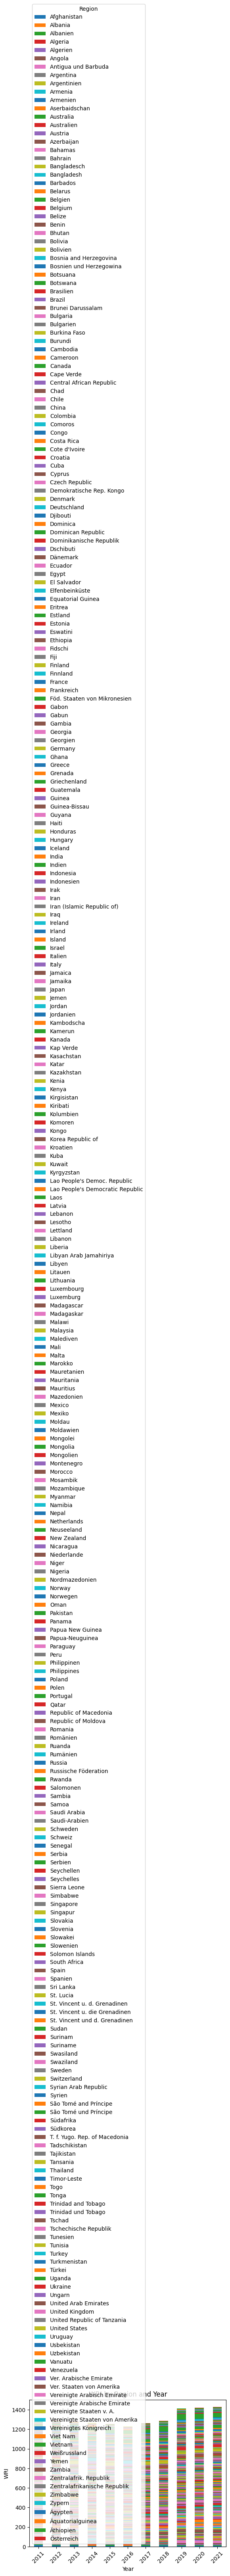

In [ ]:
plt.figure(figsize=(12, 8))
df.pivot_table(index='Year', columns='Region', values='WRI', aggfunc='mean').plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('WRI')
plt.title('WRI by Region and Year')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()


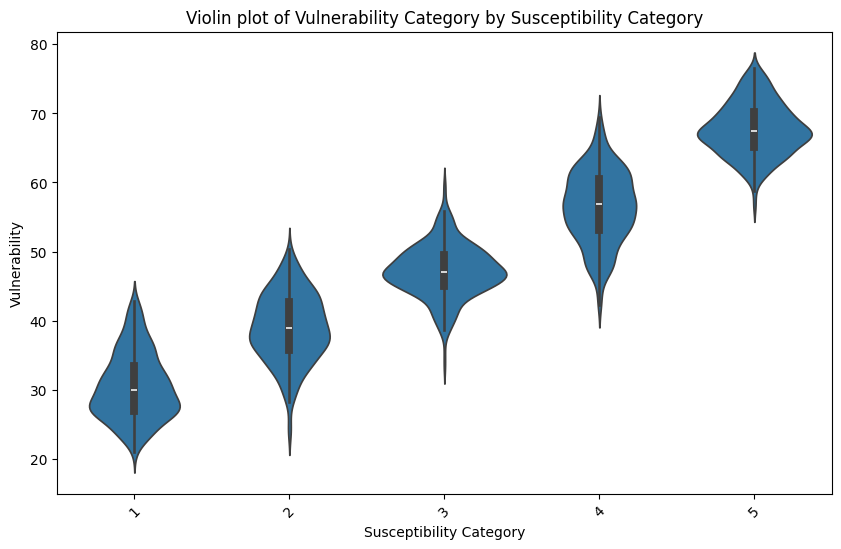

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Susceptibility Category', y='Vulnerability', data=df)
plt.xlabel('Susceptibility Category')
plt.ylabel('Vulnerability')
plt.title('Violin plot of Vulnerability Category by Susceptibility Category')
plt.xticks(rotation=45)
plt.show()


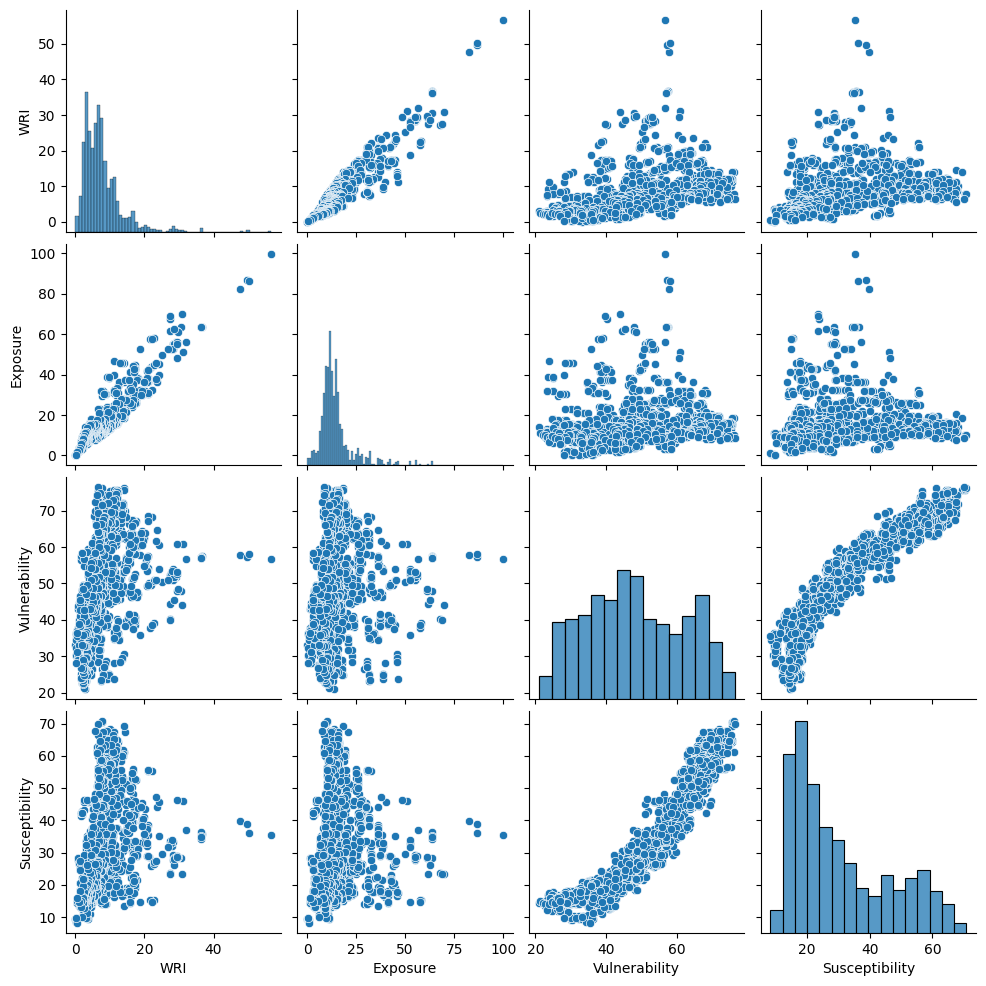

In [ ]:
import seaborn as sns

sns.pairplot(df[['WRI', 'Exposure', 'Vulnerability', 'Susceptibility']])
plt.show()


In [53]:
# Convert 'WRI Category' to numerical categories
label_encoder = LabelEncoder()
df['WRI Category'] = label_encoder.fit_transform(df['WRI Category'])


**Model Choosing**

For this project, we opted for a Random Forest classification model due to its ability to handle complex datasets with multiple features.

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. We chose this model because it can effectively capture non-linear relationships between the input features and the target variable.



In [54]:
# Define features and target
features = df[['Exposure', 'Vulnerability', 'Susceptibility', 'Lack of Coping Capabilities', 'Lack of Adaptive Capacities']]
target = df['WRI Category']


In [55]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [56]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [57]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        73
           1       0.96      0.96      0.96        72
           2       0.95      0.91      0.93        88
           3       0.95      0.99      0.97        73
           4       0.97      0.99      0.98        77

    accuracy                           0.95       383
   macro avg       0.95      0.95      0.95       383
weighted avg       0.95      0.95      0.95       383



**Results and Conclusion**

Our analysis yielded promising results, with the Random Forest classification model achieving an accuracy of 95 percent in predicting disaster risk categories. By accurately classifying the severity of disaster risk based on the WRI data, our model can provide valuable insights for decision-makers and stakeholders involved in disaster preparedness and response efforts.

In conclusion, our project demonstrates the potential of machine learning models in assessing and managing disaster risk. By leveraging data-driven approaches, we can enhance our understanding of environmental hazards and take proactive measures to mitigate their impact on communities and ecosystems.







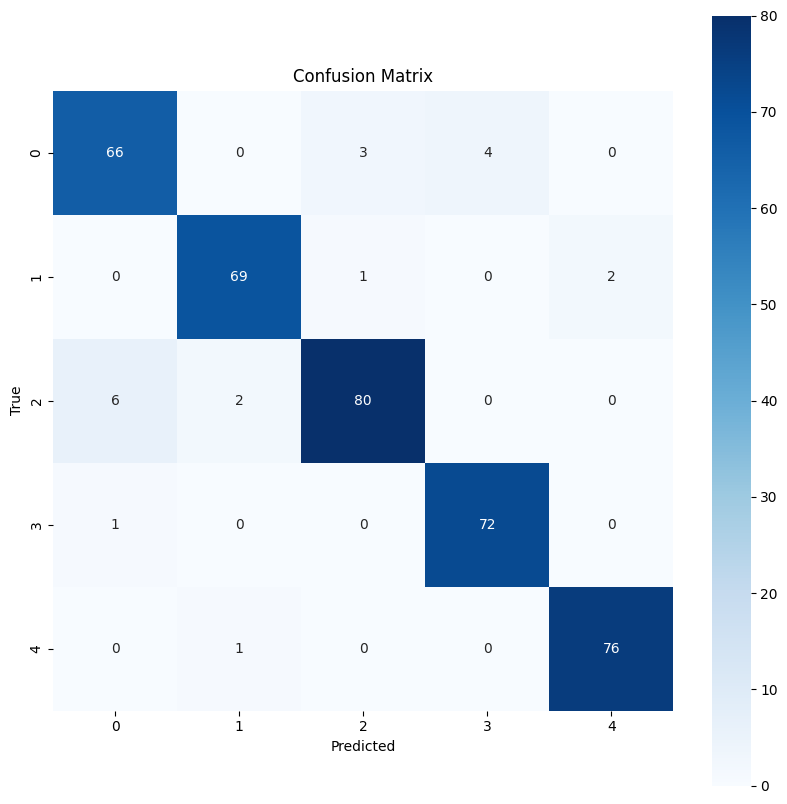

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Assuming y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True,
            xticklabels=unique_labels(y_test), yticklabels=unique_labels(y_test))
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

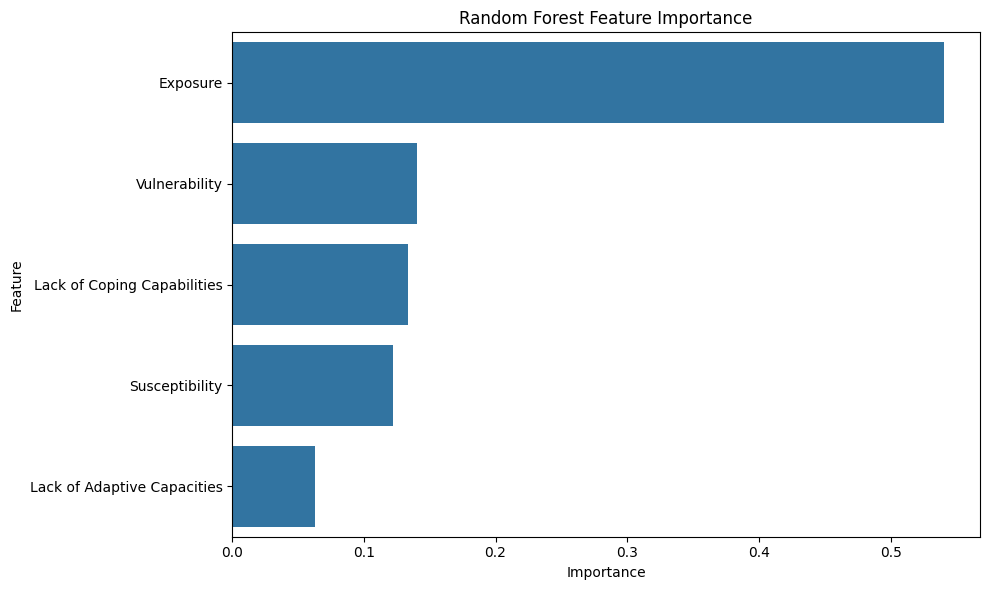

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming model is your trained RandomForestClassifier
importances = model.feature_importances_
feature_names = features.columns

# Create a DataFrame of feature importances
df_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
df_importances = df_importances.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=df_importances)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [60]:
df.columns

Index(['Region', 'WRI', 'Exposure', 'Vulnerability', 'Susceptibility',
       'Lack of Coping Capabilities', 'Lack of Adaptive Capacities', 'Year',
       'Exposure Category', 'WRI Category', 'Vulnerability Category',
       'Susceptibility Category'],
      dtype='object')

In [61]:
column_name = 'Region'
unique_entries = df[column_name].unique()

print(unique_entries)

['Vanuatu' 'Tonga' 'Philippinen' 'Salomonen' 'Guatemala' 'Bangladesch'
 'Timor-Leste' 'Costa Rica' 'Kambodscha' 'El Salvador' 'Nicaragua'
 'Papua-Neuguinea' 'Madagaskar' 'Brunei Darussalam' 'Afghanistan' 'Niger'
 'Gambia' 'Bhutan' 'Fidschi' 'Guinea-Bissau' 'Jamaika' 'Tschad' 'Honduras'
 'Dominikanische Republik' 'Chile' 'Mauritius' 'Senegal' 'Indonesien'
 'Burkina Faso' 'Burundi' 'Mali' 'Haiti' 'Sierra Leone' 'Vietnam' 'Japan'
 'Benin' 'Togo' 'Kamerun' 'Albanien' 'Mosambik' 'Mauretanien' 'Simbabwe'
 'Guinea' 'Kap Verde' 'Usbekistan' 'Ghana' 'Suriname' 'Sudan' 'Liberia'
 'Nigeria' 'Elfenbeinküste' 'Guyana' 'Malawi' 'Ecuador' 'Ruanda'
 'Tansania' 'Myanmar' 'Kirgisistan' 'Sambia' 'Äthiopien' 'Algerien'
 'Angola' 'Samoa' 'Lesotho' 'Sri Lanka' 'Pakistan' 'Kenia' 'Kongo'
 'Niederlande' 'Panama' 'Indien' 'Uganda' 'Tadschikistan' 'Swasiland'
 'Peru' 'Eritrea' 'Zentralafrikanische Republik' 'Marokko' 'Griechenland'
 'Dschibuti' 'Georgien' 'Turkmenistan' 'Komoren' 'Armenien' 'Thailand'
 'Kolumbi

In [62]:

# Define the state you want to test
state = 'India'

# Filter the dataset for the state of interest
state_df = df[df['Region'] == state]

# Calculate the mean or median values for each feature
exposure_value = state_df['Exposure'].mean()
vulnerability_value = state_df['Vulnerability'].mean()
susceptibility_value = state_df['Susceptibility'].mean()
coping_capabilities_value = state_df['Lack of Coping Capabilities'].mean()
adaptive_capacities_value = state_df['Lack of Adaptive Capacities'].mean()

# Create the state_data dictionary
state_data = {
    'Exposure': [exposure_value],
    'Vulnerability': [vulnerability_value],
    'Susceptibility': [susceptibility_value],
    'Lack of Coping Capabilities': [coping_capabilities_value],
    'Lack of Adaptive Capacities': [adaptive_capacities_value]
}

# Print the state_data dictionary
print(state_data)


{'Exposure': [11.94], 'Vulnerability': [57.254999999999995], 'Susceptibility': [37.254999999999995], 'Lack of Coping Capabilities': [80.265], 'Lack of Adaptive Capacities': [54.245000000000005]}


In [66]:
state_df = pd.DataFrame(state_data)

# Make prediction for the particular state
state_prediction = model.predict(state_df)
state_prediction_proba = model.predict_proba(state_df)

# Convert numerical category back to original category using label encoder
predicted_category = label_encoder.inverse_transform(state_prediction)

# Print the prediction
print("Predicted WRI Category for the state:", predicted_category)

# Print the probability estimates for each category
print("Probability Estimates for Each Category:")
for i, prob in enumerate(state_prediction_proba[0]):
    category = label_encoder.inverse_transform([i])[0]
    print(f"{category}: {prob}")


Predicted WRI Category for the state: ['Medium']
Probability Estimates for Each Category:
High: 0.03
Low: 0.05
Medium: 0.91
Very High: 0.01
Very Low: 0.0


In [67]:
from ipywidgets import interact, widgets

# Define a function to calculate state data and make predictions
def calculate_state_data(state):
    # Filter the dataset for the state of interest
    state_df = df[df['Region'] == state]

    # Calculate the mean values for each feature
    exposure_value = state_df['Exposure'].mean()
    vulnerability_value = state_df['Vulnerability'].mean()
    susceptibility_value = state_df['Susceptibility'].mean()
    coping_capabilities_value = state_df['Lack of Coping Capabilities'].mean()
    adaptive_capacities_value = state_df['Lack of Adaptive Capacities'].mean()

    # Create the state_data dictionary
    state_data = {
        'Exposure': [exposure_value],
        'Vulnerability': [vulnerability_value],
        'Susceptibility': [susceptibility_value],
        'Lack of Coping Capabilities': [coping_capabilities_value],
        'Lack of Adaptive Capacities': [adaptive_capacities_value]
    }

    # Print the state_data dictionary
    print("State Data:")
    print(state_data)

    # Convert state data to DataFrame
    state_df = pd.DataFrame(state_data)

    # Make prediction for the particular state
    state_prediction = model.predict(state_df)
    state_prediction_proba = model.predict_proba(state_df)

    # Convert numerical category back to original category using label encoder
    predicted_category = label_encoder.inverse_transform(state_prediction)

    # Print the prediction
    print("\nPredicted WRI Category for the state:", predicted_category[0])

    # Print the probability estimates for each category
    print("\nProbability Estimates for Each Category:")
    for i, prob in enumerate(state_prediction_proba[0]):
        category = label_encoder.inverse_transform([i])[0]
        print(f"{category}: {prob:.2f}")

# Create a text input widget for the state
state_input = widgets.Text(
    value='India',
    placeholder='Enter state name',
    description='State:',
    disabled=False
)

# Define an interaction to trigger the calculation based on user input
interact(calculate_state_data, state=state_input);


interactive(children=(Text(value='India', description='State:', placeholder='Enter state name'), Output()), _d…